In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Adjust the extracted folder path to include the subfolder
extracted_folder_path = '/content/drive/MyDrive/SignalSourceDataset/SignalSourceDataset'

# List the contents of the extracted subfolder
extracted_contents = os.listdir(extracted_folder_path)
print("Contents of the extracted subfolder:", extracted_contents)

Contents of the extracted subfolder: ['Black Bloc - If You Want Success.stem.mp4', 'Clara Berry And Wooldog - Stella.stem.mp4', 'James May - Dont Let Go.stem.mp4', 'Titanium - Haunted Age.stem.mp4', 'Wall Of Death - Femme.stem.mp4', 'features_dataset.csv']


In [ ]:
pip install moviepy


In [ ]:
pip install ssspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.6/119.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054402 sha256=1327114af0fa53280983b12e9a5a687e48fe0ed6d81fd1fbe6a8573af88f4f79
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


FastICA

In [1]:
pip install PySoundFile


REPET ALGORITHM

  return stacker(self.iter_chunks(fps=fps, quantize=quantize,

  window_function = scipy.signal.hamming(window_length, sym=False)

  20 * np.log10(audio_spectrogram), aspect="auto", cmap="jet", origin="lower"



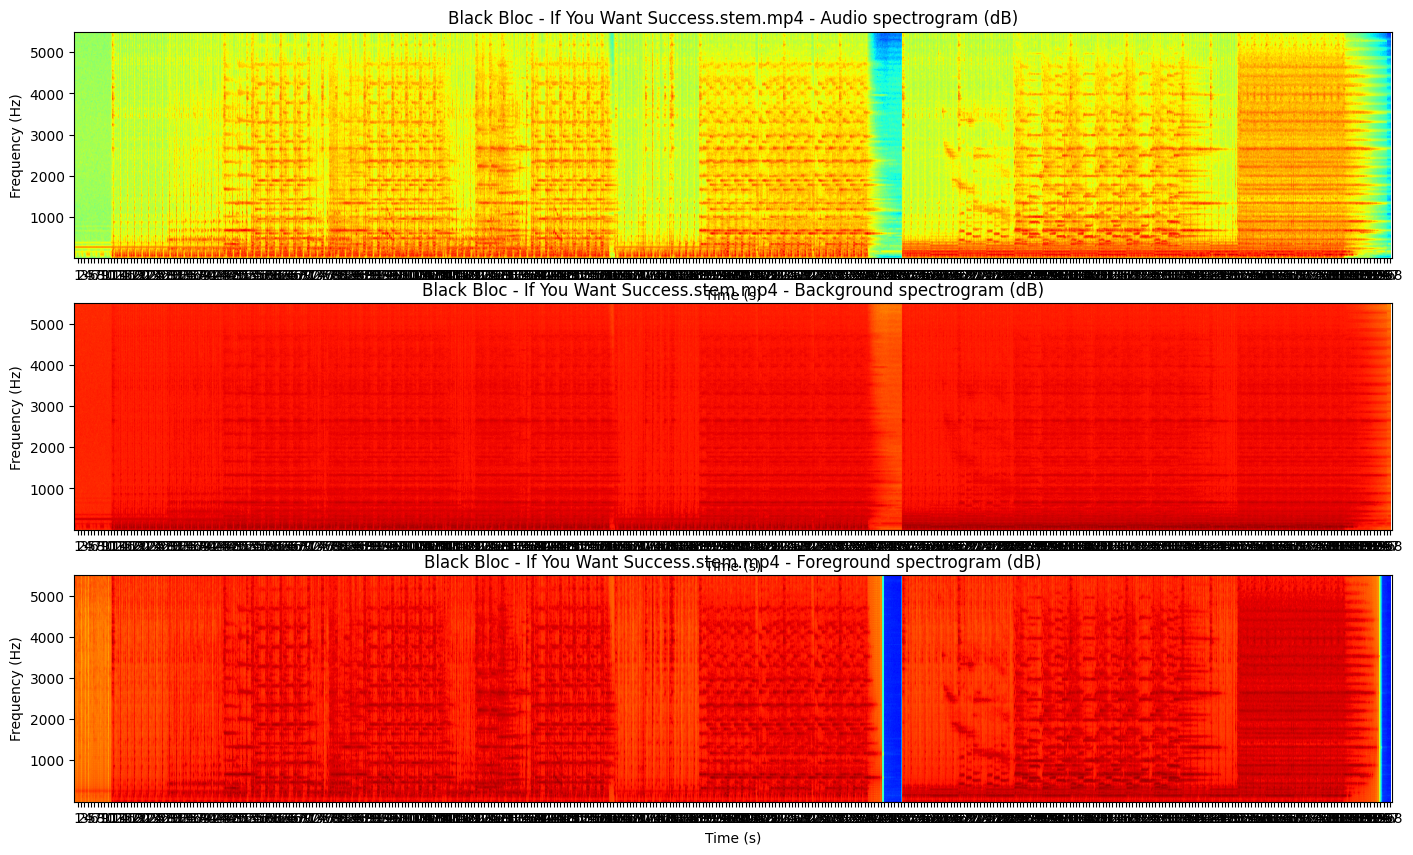

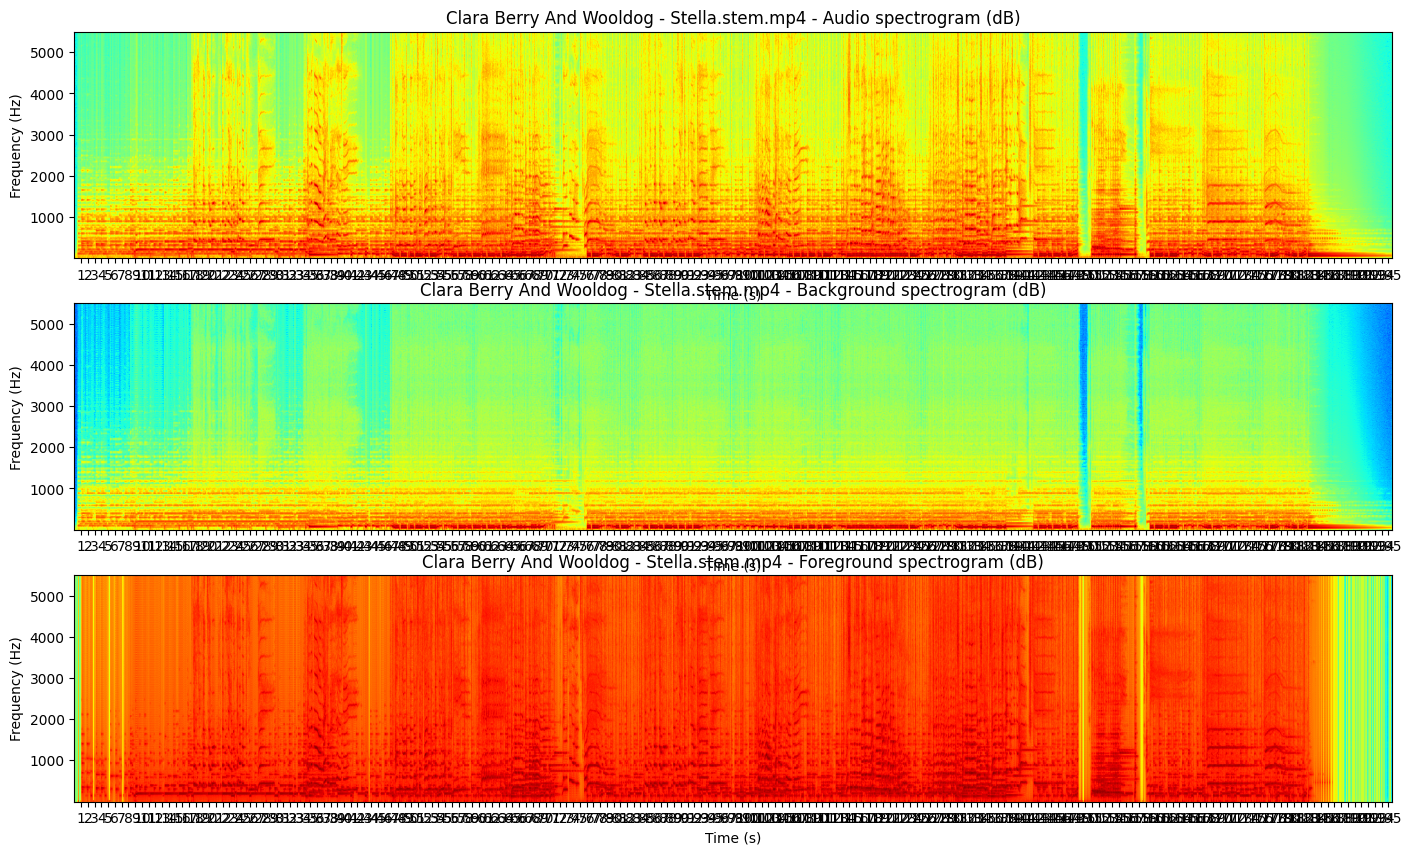

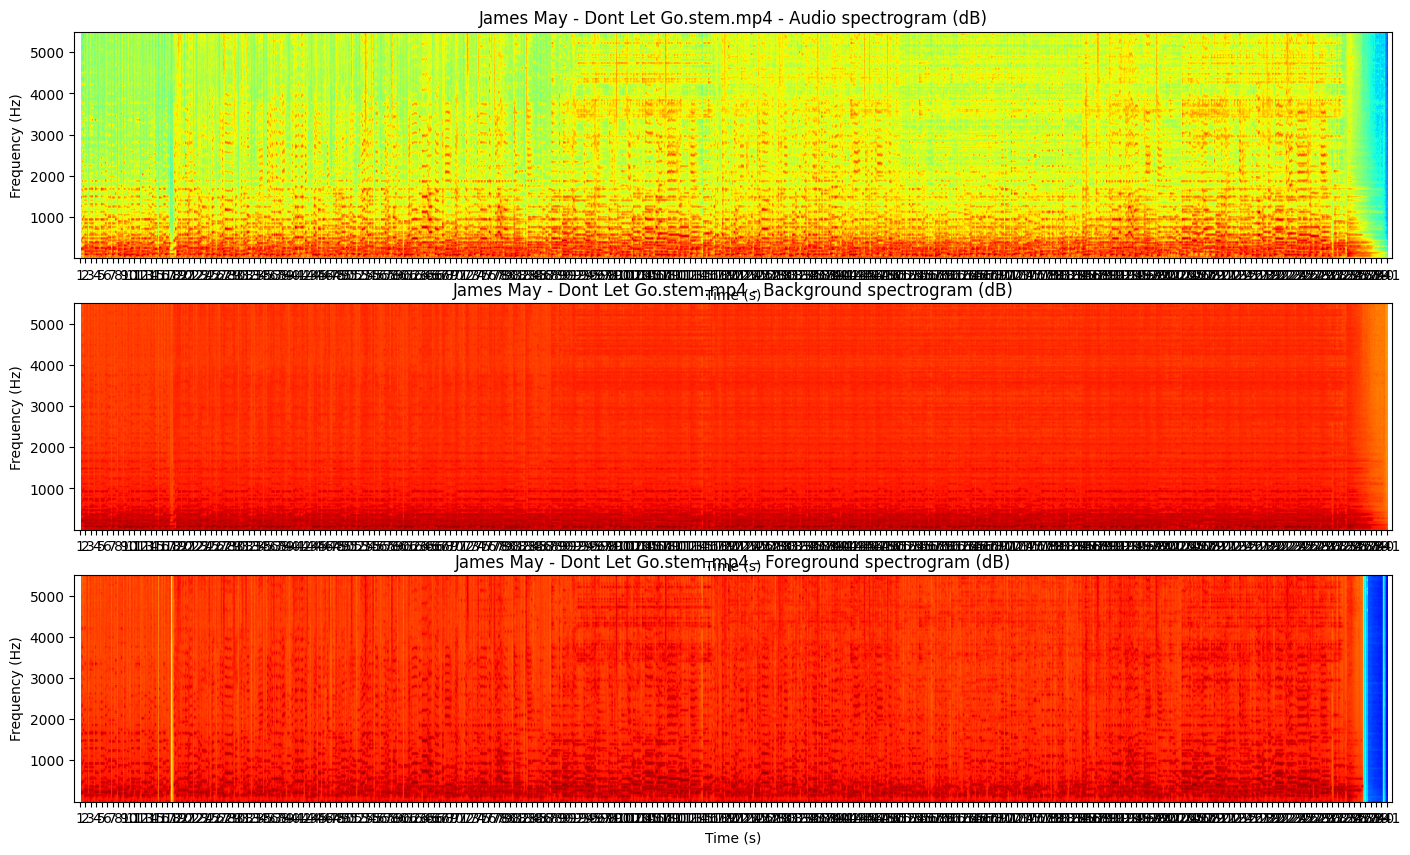

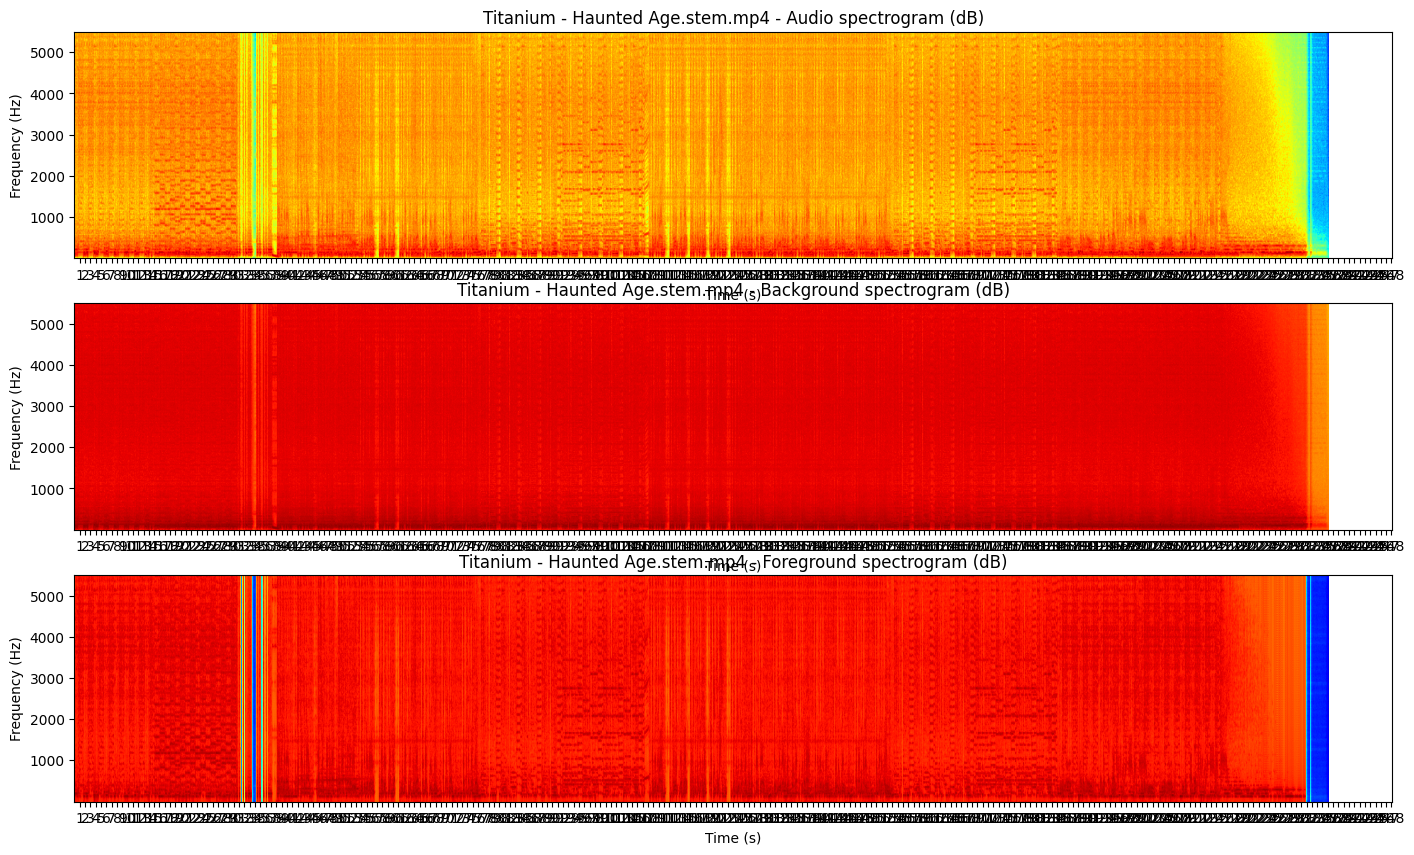

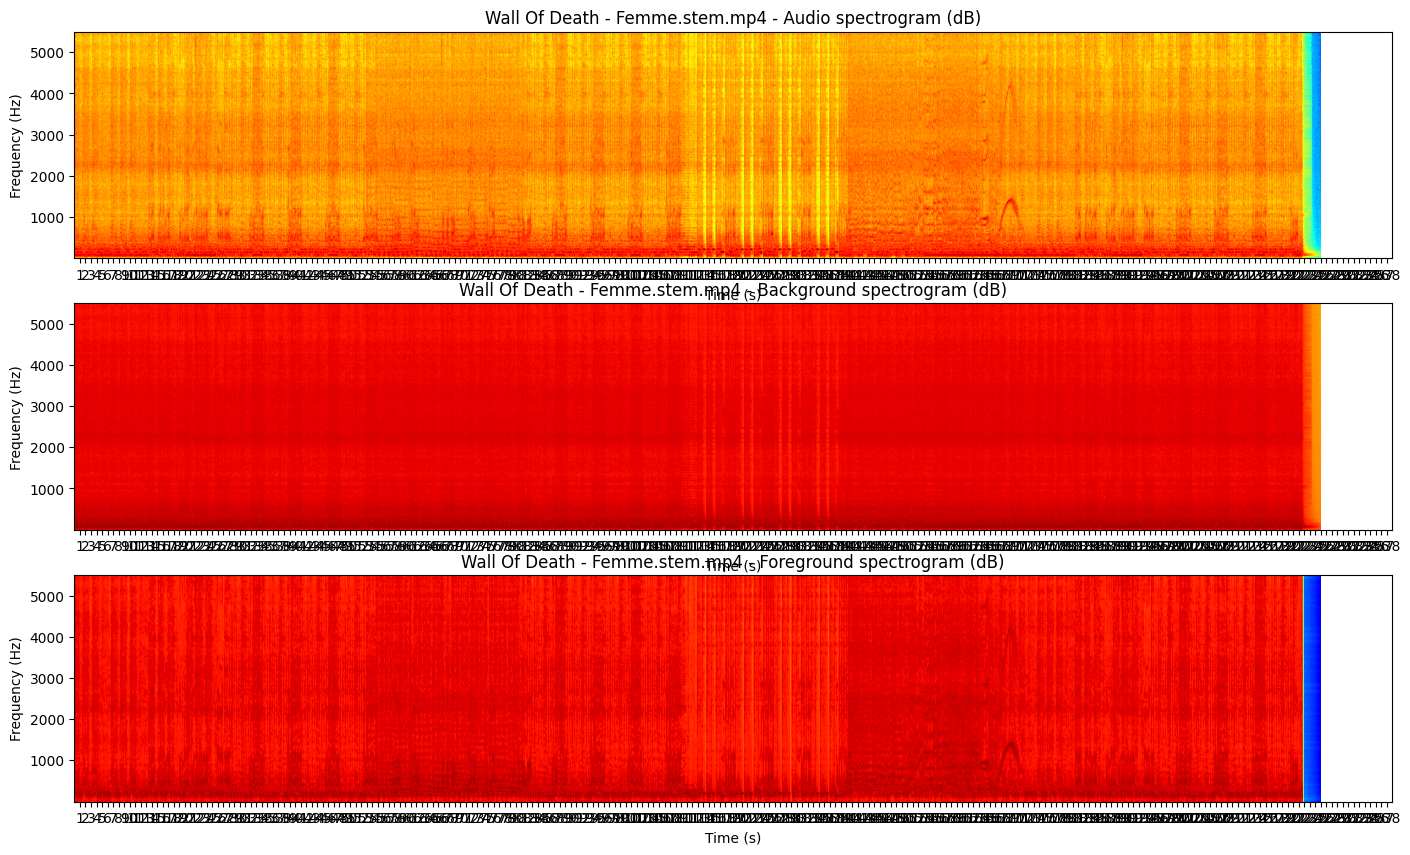

In [ ]:
import os
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

# Function to read audio from an MP4 file
def read_mp4(file_path):
    clip = VideoFileClip(file_path)
    audio_signal = np.array(clip.audio.to_soundarray())
    sampling_frequency = clip.audio.fps
    return audio_signal, sampling_frequency

# Specify the folder containing the audio files
folder_path = "/content/drive/MyDrive/SignalSourceDataset/SignalSourceDataset/"

# Get a list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# Loop through the first five files and process each one
for file_name in file_list[:5]:
    file_path = os.path.join(folder_path, file_name)

    # Read the audio signal (normalized) with its sampling frequency in Hz
    audio_signal, sampling_frequency = read_mp4(file_path)

    # Estimate the background signal, and the foreground signal
    background_signal = repet.original(audio_signal, sampling_frequency)
    foreground_signal = audio_signal - background_signal

    # Write the background and foreground signals
    background_file = f"background_{file_name[:-4]}.wav"
    foreground_file = f"foreground_{file_name[:-4]}.wav"
    repet.wavwrite(background_signal, sampling_frequency, background_file)
    repet.wavwrite(foreground_signal, sampling_frequency, foreground_file)

    # Compute the mixture, background, and foreground spectrograms
    window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
    window_function = scipy.signal.hamming(window_length, sym=False)
    step_length = int(window_length / 2)
    number_frequencies = int(window_length / 2) + 1
    audio_spectrogram = abs(repet._stft(np.mean(audio_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
    background_spectrogram = abs(repet._stft(np.mean(background_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
    foreground_spectrogram = abs(repet._stft(np.mean(foreground_signal, axis=1), window_function, step_length)[0:number_frequencies, :])

    # Display the mixture, background, and foreground spectrograms in dB, seconds, and Hz
    time_duration = len(audio_signal) / sampling_frequency
    maximum_frequency = sampling_frequency / 8
    xtick_step = 1
    ytick_step = 1000
    plt.figure(figsize=(17, 10))
    plt.subplot(3, 1, 1)
    repet.specshow(audio_spectrogram[0:int(window_length / 8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
    plt.title(f"{file_name} - Audio spectrogram (dB)")
    plt.subplot(3, 1, 2)
    repet.specshow(background_spectrogram[0:int(window_length / 8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
    plt.title(f"{file_name} - Background spectrogram (dB)")
    plt.subplot(3, 1, 3)
    repet.specshow(foreground_spectrogram[0:int(window_length / 8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
    plt.title(f"{file_name} - Foreground spectrogram (dB)")
    plt.show()


Pre-emphasis

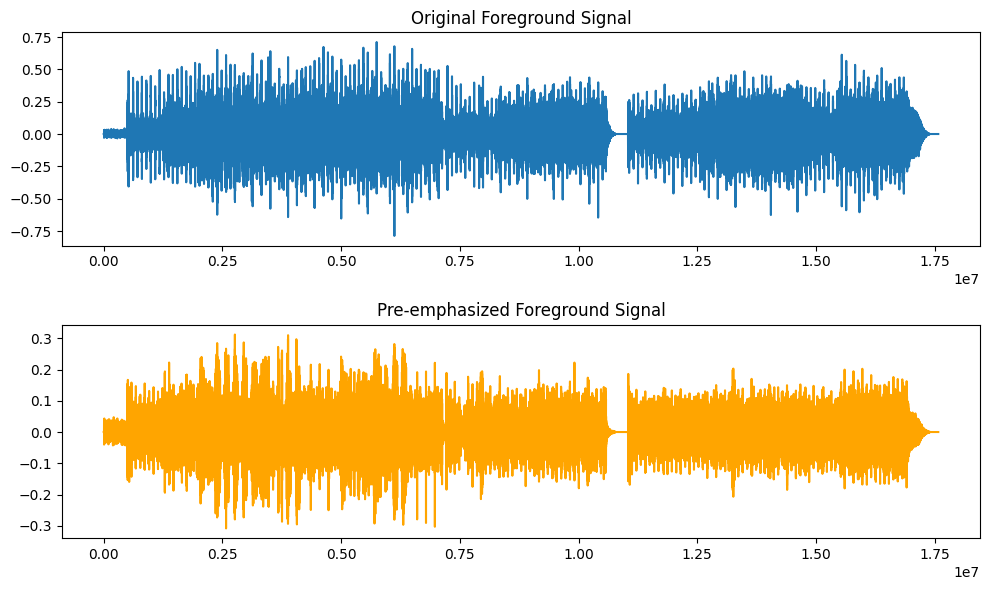

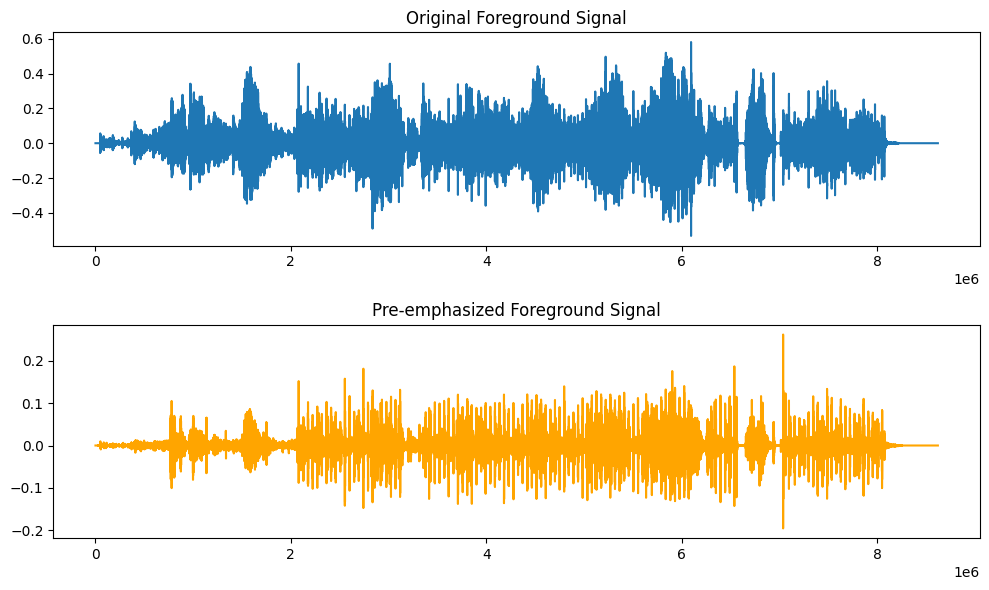

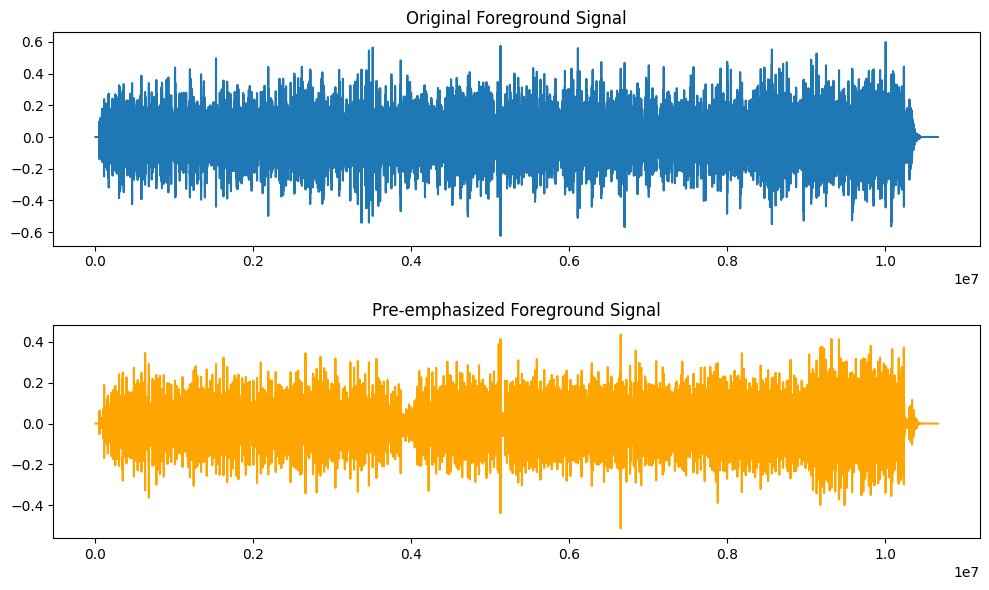

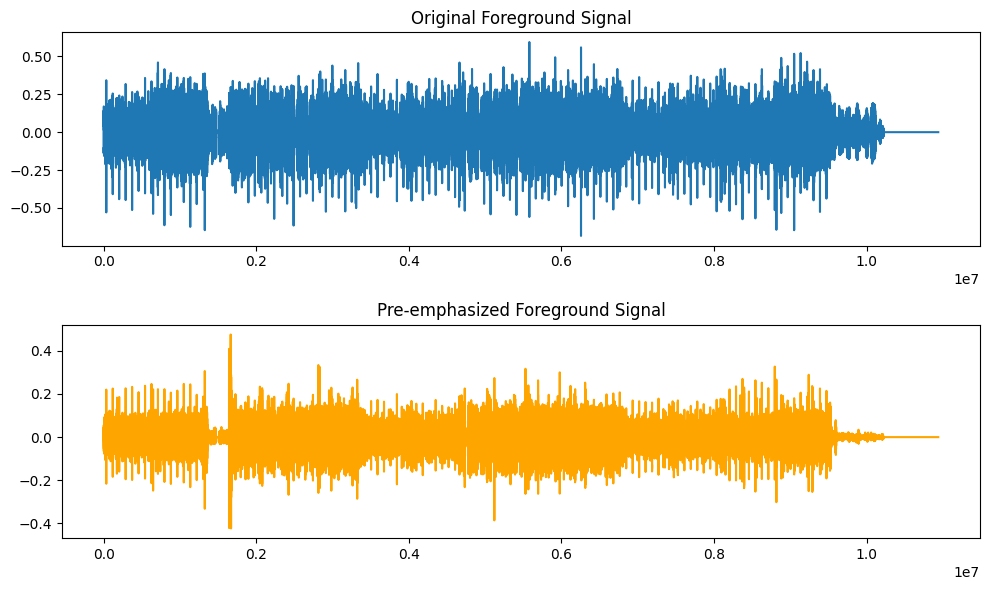

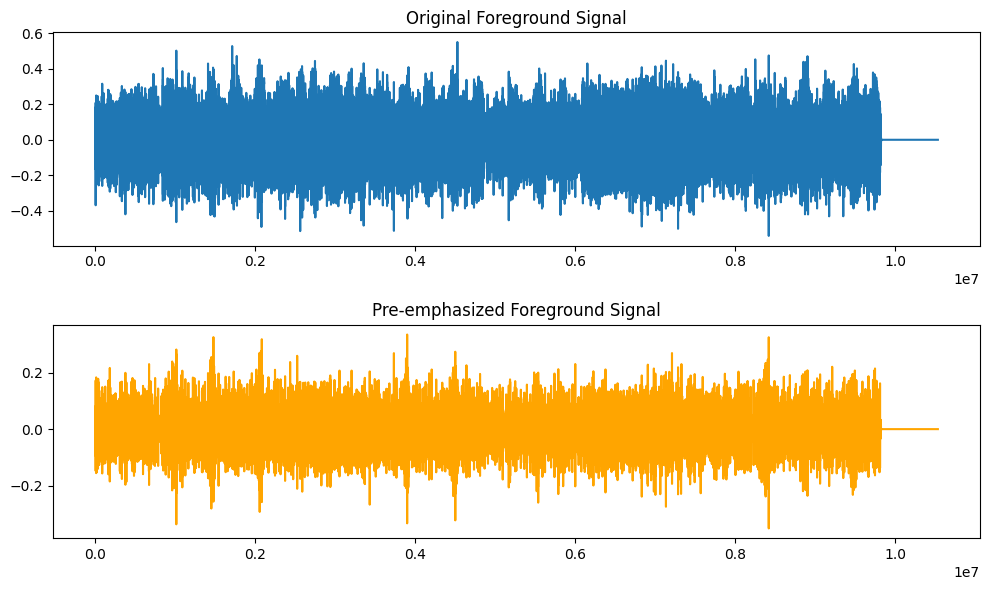

In [ ]:
import os
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

# Function to read audio from an MP4 file
def read_mp4(file_path):
    clip = VideoFileClip(file_path)
    audio_signal = np.array(clip.audio.to_soundarray())
    sampling_frequency = clip.audio.fps
    return audio_signal, sampling_frequency

# Function to apply pre-emphasis to the signal
def apply_pre_emphasis(signal, alpha=0.97):
    # Apply pre-emphasis filter
    pre_emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
    return pre_emphasized_signal

# Function to write audio to a file
def write_audio_file(signal, sampling_frequency, file_name):
    repet.wavwrite(signal, sampling_frequency, file_name)

# Specify the folder containing the audio files
folder_path = "/content/drive/MyDrive/SignalSourceDataset/SignalSourceDataset/"

# Get a list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# Loop through the first five files and process each one
for file_name in file_list[:5]:
    file_path = os.path.join(folder_path, file_name)

    # Read the audio signal (normalized) with its sampling frequency in Hz
    audio_signal, sampling_frequency = read_mp4(file_path)

    # Estimate the background signal, and the foreground signal
    background_signal = repet.original(audio_signal, sampling_frequency)
    foreground_signal = audio_signal - background_signal

    # Apply pre-emphasis to the foreground signal
    pre_emphasized_foreground_signal = apply_pre_emphasis(foreground_signal[:, 0])  # Adjust if you have multiple channels

    # Save the pre-emphasized foreground audio file to disk
    pre_emphasized_foreground_file = f"pre_emphasized_foreground_{file_name[:-4]}.wav"
    write_audio_file(pre_emphasized_foreground_signal, sampling_frequency, pre_emphasized_foreground_file)

    # Plot the original and pre-emphasized signals
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(foreground_signal[:, 0], label='Original Foreground Signal')
    plt.title('Original Foreground Signal')
    plt.subplot(2, 1, 2)
    plt.plot(pre_emphasized_foreground_signal, label='Pre-emphasized Foreground Signal', color='orange')
    plt.title('Pre-emphasized Foreground Signal')
    plt.tight_layout()
    plt.show()


Butterworth low pass filter

In [ ]:
import os
import numpy as np
import scipy.signal
import repet
from moviepy.editor import VideoFileClip

# Function to read audio from an MP4 file
def read_mp4(file_path):
    clip = VideoFileClip(file_path)
    audio_signal = np.array(clip.audio.to_soundarray())
    sampling_frequency = clip.audio.fps
    return audio_signal, sampling_frequency

# Function to design a low-pass filter and apply it to the signal
def apply_lowpass_filter(signal, sampling_frequency, low_cutoff):
    nyquist = 0.5 * sampling_frequency
    low = low_cutoff / nyquist
    b, a = scipy.signal.butter(4, low, btype='low', analog=False)
    filtered_signal = scipy.signal.lfilter(b, a, signal, axis=0)
    return filtered_signal

# Specify the folder containing the audio files
folder_path = "/content/drive/MyDrive/SignalSourceDataset/SignalSourceDataset/"

# Get a list of all files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith(".mp4")]

# Assuming you have at least one file in the folder
if len(file_list) >= 1:
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)

        # Read the audio signal (normalized) with its sampling frequency in Hz
        audio_signal, sampling_frequency = read_mp4(file_path)

        # Estimate the background signal
        background_signal = repet.original(audio_signal, sampling_frequency)

        # Apply a low-pass filter to get only the low-frequency component
        lowpass_cutoff = 5000  # Adjust this value based on your requirements
        lowpass_filtered_background_signal = apply_lowpass_filter(background_signal, sampling_frequency, lowpass_cutoff)

        # Save the filtered audio file to disk
        filtered_background_file = f"filtered_lowpass_{file_name[:-4]}.wav"
        repet.wavwrite(lowpass_filtered_background_signal, sampling_frequency, filtered_background_file)
